# Example Workflow: Lake Water Quality Monitoring

## Introduction

Water quality monitoring in lakes and reservoirs has a number of applications, from climate science to aquaculture. Earth observation techniques enable us to compliment ground sensors by monitoring over a larger area or attempt to provide information where no ground sensors are present.

Here we want to go through the process of calculating some of the properties used in modelling water quality. For our case study, we will focus on a part of Lake Victoria in Southern Uganda.

In [5]:
import rasterio
import geopandas as gpd
import contextily as ctx
from shapely.geometry import asPolygon
import numpy as np

In [6]:
footprint_geom = asPolygon(
    np.array(
        [
            [
              31.629638671875,
              -1.2962761196418089
            ],
            [
              34.11529541015625,
              -1.2962761196418089
            ],
            [
              34.11529541015625,
              0.6426867176331666
            ],
            [
              31.629638671875,
              0.6426867176331666
            ],
            [
              31.629638671875,
              -1.2962761196418089
            ]
        ]
    )
)

C:\Users\arevi\anaconda3\envs\yt_project_v2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  """


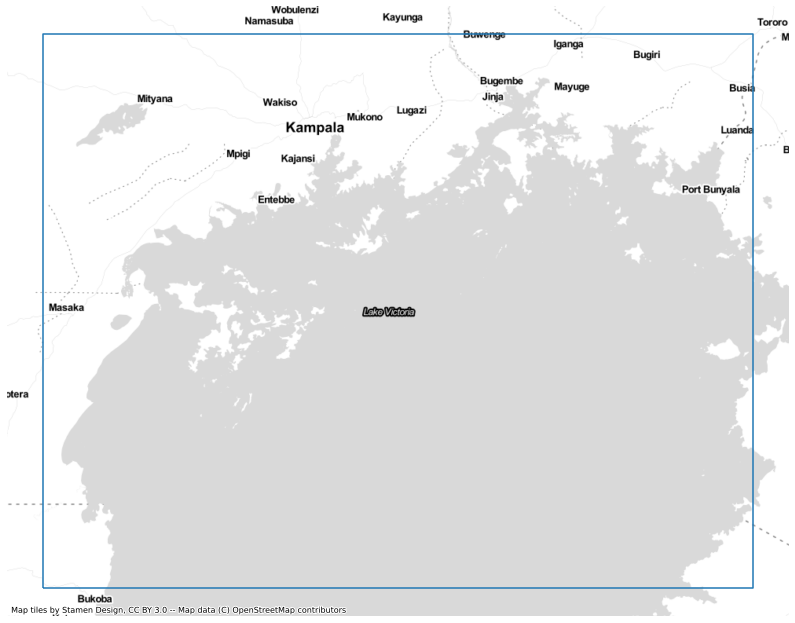

In [7]:
footprint = gpd.GeoDataFrame([{'id':0, 'geometry': footprint_geom}])
footprint.crs = "epsg:4326"
footprint
ax = footprint.to_crs(epsg=3857).boundary.plot(figsize=(14,12))
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

You can either get the rasters from [scihub](https://scihub.copernicus.eu/dhus/#/home) or use a python api like sentinelsat. I found a suitable image with relatively low cloud (not sure if the download link will work):
https://scihub.copernicus.eu/dhus/odata/v1/Products('d373a1aa-0e8c-492e-9889-ee3fd06eaf79')/$value

Date: 2021-03-15T07:57:01.024Z

Filename: S2A_MSIL1C_20210315T075701_N0209_R035_T36MVE_20210315T092856.SAFE

Identifier: S2A_MSIL1C_20210315T075701_N0209_R035_T36MVE_20210315T092856

Instrument: MSI

Satellite: Sentinel-2

Size: 653.05 MB

We want to measure values for different water quality properties. [Several different properties can be estimated using remote sensing](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5017463/pdf/sensors-16-01298.pdf). Commonly we would work with in-situ data to create some empirical relationships. Here, rather than obtaining physical concentrations we can simply estimate relative quantities and will focus on the following as an example:
1. Chlorophyll-a, chl-a
2. Colored dissolved organic matter, CDOM
3. Water surface temperature

For chl-a, we can estimate values using the different reflectance bands in the following equations:

`chl-a ~ R(443 nm)/R(560 nm) ~ (B1/B3)` <= Case 1: for water dominated by phytoplankton

`chl-a ~ R(705 nm)/R(665 nm) ~ (B5/B4)` <= Case 2: more complex mixture of optically active components (including CDOM)

A more precise index which is commonly used to provide an estimated upper limit on the chlorophyll content is the Maximum Chlorophyll Index, `MCI = R(705 nm) - R(605 nm) - 0.53*(R(740 nm) - R(605 nm)) = B5 - B4 - 0.53*(B6 - B4)`.

And we can estimate CDOM absorption at 440 nm using the following:

`CDOM(440 nm) ~ 8 * (B3 / B2)^(-1.4)`

## Picking out water bodies

Sentinel-2 NDWI for waterbody detection can be constructed by using:

"Green" Band 3 (559nm) and "NIR" Band 8A (864nm)

In [ ]:
# First load up a raster over the AOI (using window?)

In [ ]:
# Calculate NDWI
def ndwi(green, nir):
    return (green - nir)/(green + nir)

In [ ]:
# Have a look at the histogram of pixel values for NDWI

In [ ]:
# Should be able to select "water" pixels based on a threshold

## Maximum Chlorophyll Index

Calculating MCI using the following `MCI = B5 - B4 - 0.53*(B6 - B4)` from above.

In [25]:
# This will require upsampling to get the bands in the same resolution

In [ ]:
# Again have a look at the histogram of pixel values (for water pixels)

In [ ]:
# From the concentrations this should imply we have Case 2

I'm not sure what we will see here but it might be interesting to calculate `chl-a` using the Case 2 equation

## CDOM

In [ ]:
# Calculate CDOM

In [ ]:
# Produce a phase diagram of CDOM vs MCI or chl-a?

## Water Temperature

Here we need to bring in data from other satellites. Temperature can be estimated with Landsat I believe but we can make use of lower resolution, MODIS data to estimate surface temperature. I need to do more reading about this and I will get back to you!